# Day 16 Group Worksheet
Oct 29, 2025

If you're working on CoCalc, it's good to rename your notebook with a fun group name and to include your names below so that you can easily find it later for reference.

* Group members:

# Task 1. Is Gandalf's Sparkle spell operating at a frequency of 0.4 Hz?
Gandalf is worried that his wand has been misbehaving and comes to you for help. He says that when he casts his "Sparkle" spell, the wand should emit an energy beam with a time dependence of $e^{\sin(2\pi f t)}$, where the frequency, $f$, is expected to be 0.4 Hz. You make some measurements with a detector that has an offset, so you expect your measurements to follow the model,

$$a e^{\sin(2\pi f t)}+b $$. 

The data are given below with x = time, y = power measurement.

Use `scipy.optimize.curve_fit` to fit the data to the expected model to **find the frequency, with uncertainty,** of Gandalf's wand. Use $a$, $b$, and $f$ as adjustable parameters. After you have found the best-fit model, make a plot with the data as points and the fitted expression as a solid line. 

**Important!** Reasonable initial guesses for the parameters will be ***critical*** in getting this fit to work. You will likely find that it is easiest to plot the predicted function using your initial guesses with the data to fine-tune your initial guesses before performing the actual fit. 

**Compare your fitted frequency for the Sparkle spell to the expected frequency of 0.4 Hz.**

In [ ]:
# Data
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

x = np.array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6])
y = np.array([ 2.61994972,  1.52344119,  2.66695642,  2.63510806,  3.60031101,
        2.57370534,  2.89069675,  0.79754501,  1.74746723,  1.31627036,
        1.20939655,  0.74268696,  0.85516989, -0.06723689,  1.14169057,
        0.86339867,  1.1910958 ,  1.62603995,  2.00552346,  2.55784377,
        4.00631938,  3.2216312 ,  3.86061875,  2.71320536,  3.00682441,
        2.11610599,  0.52543879,  1.21171504,  0.59027355,  0.96636379,
        0.80961938,  0.79622451,  0.3739691 ,  1.13397128,  1.66157585,
        2.66665366,  1.50829326,  3.25834323,  4.05615499,  3.71286446,
        3.24564437,  1.63026018,  3.79772738,  1.31377024,  1.32611747,
       -0.10359754,  0.78150486,  0.02489367,  0.41951861,  0.71277322,
        0.96786975,  1.54895206,  1.2514267 ,  2.55330234,  3.59849077,
        3.50118096,  3.62727696])
dy = np.array([0.6810214 , 0.62563064, 0.01070687, 0.85023779, 0.2210469 ,
       0.44244275, 0.22754862, 0.75183376, 0.03598818, 0.06791264,
       0.32464543, 0.55078786, 1.10090497, 0.92183415, 0.57892601,
       0.06316342, 0.51616619, 0.11769887, 0.0520352 , 0.3879953 ,
       1.35164277, 0.50750878, 0.83302854, 0.51599122, 0.73272766,
       0.57767488, 0.32889288, 0.21739519, 0.77054122, 0.5742275 ,
       0.10493464, 0.50552201, 0.35216945, 0.13766787, 0.41665939,
       0.63508184, 0.91030971, 0.0750346 , 0.5638139 , 0.65856472,
       0.56797019, 0.48034953, 1.23783708, 0.04598866, 0.49142786,
       0.51589079, 0.19031348, 0.49042393, 0.7350357 , 0.38123459,
       0.94595124, 0.05787982, 0.67835271, 0.85777096, 0.71185902,
       0.12812123, 0.14148552])

In [20]:
# Your code here

from scipy import optimize
import numpy as np
from matplotlib import pyplot as plt

func = lambda t, a, f, b: a * np.exp(np.sin(2 * np.pi * f * t)) + b
def print_uncertainties(names, params, covariance_matrix):
    uncerts = np.sqrt(np.diag(covariance_matrix))
    for name, param, uncert in zip(names, params, uncerts):
        print(f'{name} = {param:.4f} +/- {uncert:.4e}')

In [21]:
initial_guess=[1, 0.5, 0]

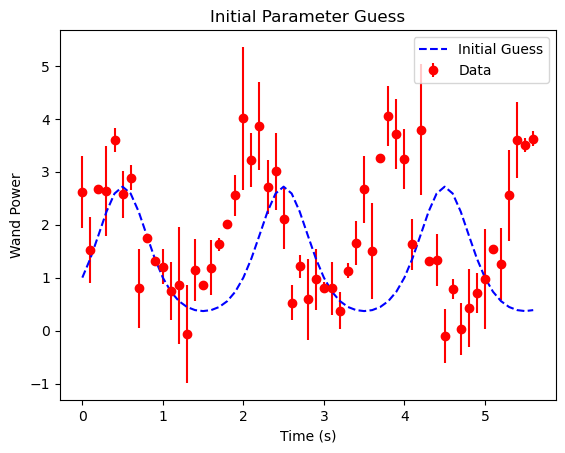

In [26]:
plt.figure()
plt.errorbar(x,y,dy, fmt='ro', label='Data')
yfit1 = func(x,*initial_guess)
plt.plot(x,yfit1, color='blue', linestyle='dashed', label='Initial Guess')
plt.title('Initial Parameter Guess')
plt.xlabel('Time (s)')
plt.ylabel('Wand Power')
plt.legend()
plt.show()

In [23]:
## Solution part 2



Amplitude (WP) = 1.2437 +/- 8.9651e-02
Offset (WP) = 0.5844 +/- 3.3805e-03
Frequency (Hz) = 0.2104 +/- 1.4133e-01


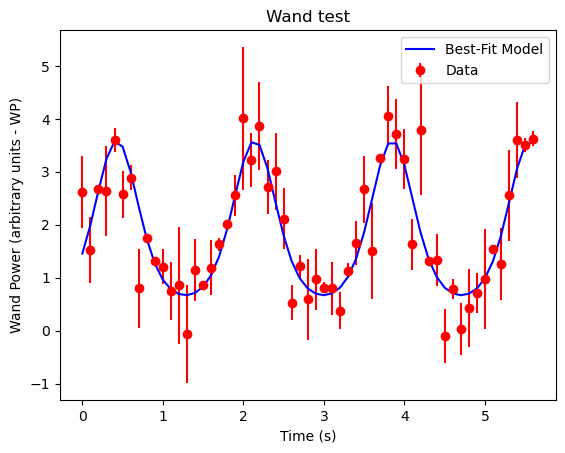

In [28]:
## Solution part 3

# Now that we have some reasonable initial guesses, let's peform the fit
params, cov = optimize.curve_fit(func, x, y, p0=initial_guess)
print_uncertainties(['Amplitude (WP)', 'Offset (WP)', 'Frequency (Hz)'],params,cov)
plt.errorbar(x,y,dy, fmt='ro',label='Data')
yfit = func(x,*params)
plt.plot(x, yfit,"b-",label='Best-Fit Model')
plt.title("Wand test")
plt.xlabel("Time (s)")
plt.ylabel("Wand Power (arbitrary units - WP)")
plt.legend()
plt.show()

# Task 2: Simulate and fit radiation shielding data

This task is based on a Physics 119 experiment, where you are seeking to measure the attentuation coefficient of some shielding with respect to a specific source of radiation. 

A simple, but effective first-order model for the behaviour of the shielding is that the radiation count rate observed in your detector can be modelled as

$$R(x) = R_0 e^{-μx} + R_b,$$

where 

* $R_0$ is the radiation count-rate observed by the detector when the radiation source is placed at a specific location/distance from the detector
* $x$ is the thickness of the shielding in between the source and detector, where this shielding has an attenuation coefficient $\mu$,
* $R_b$ is the background / environmental radiation count-rate, which is negligibly unaffected by this shielding, and 
* $R(x)$ is the count-rate measured by the detector when a thickness $x$ of shielding is present, but also includes contributions due to background/environmental radiation. 

In Part 1 of this task you are going to build a simulation to produce the data---you are going to run the experiment. In part 2 of this task you are going to analyze the data.

## *Task 2.1: Simulate radiation shielding data*

Build a simulation of an experiment to measure the attenuation coefficent of the shielding, $\mu$, with the following parameters and constraints.

1. When generating the simulated data, use the following parameters.<br>
  * $R_0 = 20\mbox{ counts/s}$,
  * $R_b = 0.18\mbox{ counts/s}$, and
  * $\mu = 0.5\mbox{ mm}^{-1}$.<br><br>
1. Observations of radioactive decay rates can be modelled using a Poisson distribution based on the expected number of counts, $\lambda$, for the time over which you are measuring ($R(x) \times t$ for your data). 
  * For example, if you are modelling a one hour (3600 seconds) measurement of the background count-rate, the expected number of counts that you would measure would be $\lambda = 0.18\mbox{ counts/s} \times 3600 \mbox {s} = 648 \mbox{ counts}$. The number of counts that you would actually measure (i.e. your simulated measurement) in one hour would follow a Poisson distribution with $\lambda = 648$. For reference, values of $\lambda = 20$ or higher a Poisson distribution behaves approximately like a Gaussian distribution with a standard deviation equal to the square root of $\lambda$. We want you to model these data using a Poisson distribution, but are discussing this Gaussian-like behaviour to help you understand why you need only the one parameter $\lambda$ to model both the approximate mean and variation when using a Poisson distribution. <br><br>
1. Use your simulation to collect data at various thicknesses of shielding, $x$. Your cumulative data collection time across all of your different thicknesses, $x$, should be 30 minutes. This means that you will want to balance how many different thicknesses at which you want to measure with how long you want to measure at each of these thicknesses. To get the best possible estimate of $\mu$, it is best to included some measurements at a few different thicknesses where you expect the count-rate to be dominated by background radiation (meaning at thicknesses where the contribution of the exponential term is very small because the shielding has blocked most of the radiation from the source). 

**Produce a plot of your measured/simulated count-rates as a function of shielding thickness.**

In [122]:
num_samples = 10
time_mins   = 30

$$u[\lambda] = \lambda \sqrt{\left(\frac{u[N]}{N}\right)^2 + \left(\frac{u[t]}{t}\right)^2}$$
for the simulation, $u[t] = 0$ and $u[N] = \sqrt{N}$, so
$$u[\lambda] = \frac{\lambda}{\sqrt{N}}$$

In [124]:
# Code to produce simulated data
sim_time = time_mins * 60
func2 = lambda x, r0, mu, rb: r0 * np.exp(-mu * x) + rb
shielding = np.arange(1,num_samples+1)
count_theoretical = func(shielding, 20, 0.5, 0.18)

rates = np.random.poisson(count_theoretical * sim_time) / sim_time
rate_uncert = rates / np.sqrt(shielding)

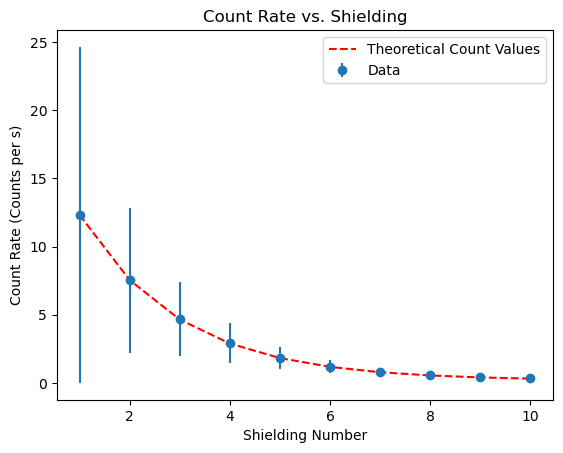

In [125]:
plt.figure()
plt.title('Count Rate vs. Shielding')
plt.ylabel('Count Rate (Counts per s)')
plt.xlabel('Shielding Number')
plt.errorbar(shielding,rates,yerr=rate_uncert,fmt='o',label='Data')
plt.plot(shielding,count_theoretical,color='red',linestyle='dashed',label='Theoretical Count Values')
plt.legend()
plt.show()

## *Task 2.2: Analyze simulated data---what is your experimentally determined attenuation coefficient,* 𝜇?

**The purpose of this task is to look more carefully at fitting parameters and fitting parameter uncertainties. Given that we know the "true" values of what was used to simulate the data, we have an excellent mechanism to compare our fitting parameters, within uncertainty, with the expected values.**

Use `optimize.curve_fit` to fit the model to your simulated data and then generate a plot of your data (with uncertainties) and the fitted model. Additionally, extract $mu$ and its uncertainty from the fit parameters. If you are feeling ambitous, you should also generate a graph of residuals vs $x$.

In [132]:
# Your code here
initial_guess_2=[1, 1, 0]

In [133]:
params2, cov2 = optimize.curve_fit(func2, shielding, rates, p0=initial_guess_2)
print_uncertainties(['Amplitude Count Rate', 'Attentuation Coefficient', 'Background Count Rate'], params2, cov2)

Amplitude Count Rate = 19.9700 +/- 4.1807e-02
Attentuation Coefficient = 0.4989 +/- 1.6577e-03
Background Count Rate = 0.1855 +/- 9.9366e-03


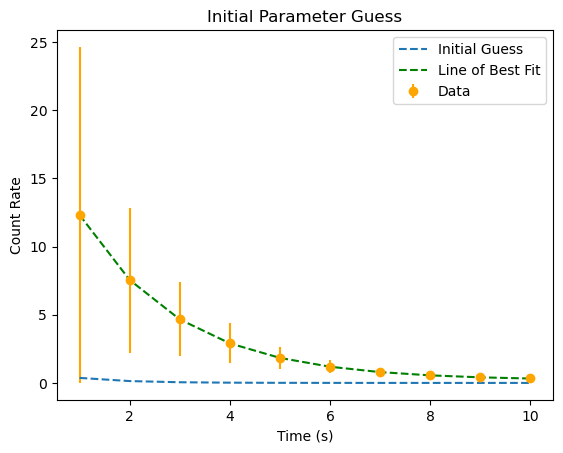

In [141]:
plt.figure()
plt.errorbar(shielding,rates,rate_uncert, fmt='o', color='orange', label='Data')
plt.plot(shielding,func2(shielding, *initial_guess_2), 
         linestyle='dashed', label='Initial Guess')
plt.plot(shielding, func2(shielding, *params2), 
         color='green', linestyle='dashed', label='Line of Best Fit')
plt.title('Initial Parameter Guess')
plt.xlabel('Time (s)')
plt.ylabel('Count Rate')
plt.legend()
plt.show()

Theoretical: $\mu = 0.5$ $\text{mm}^{-1}$.

Experimental: $\mu = 0.4989 \pm 0.0017$ $\text{mm}^{-1}$.

Error: $\delta \mu = 0.0011 \pm 0.0017$ $\text{mm}^{-1}$.